In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
from numbers import Rational
# Load the dataset
data = pd.read_csv("/content/merged_output.csv")
rating=pd.read_csv("/content/rating_final.csv")
user_profile=pd.read_csv("/content/userprofile.csv")
user_cuisine=pd.read_csv("/content/usercuisine.csv")
geo=pd.read_csv("/content/geoplaces2.csv")
data.head()
data.info()


In [ ]:

y = data['rating']


In [ ]:
# Select relevant features
X = data[['food_rating', 'service_rating', 'alcohol', 'smoking_area', 'price', 'Rambience', 'franchise', 'area']]


In [ ]:
# Convert categorical columns to dummy variables
X = pd.get_dummies(X, columns=['alcohol', 'smoking_area', 'price', 'Rambience', 'franchise', 'area'], drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical columns, e.g., 'food_rating' and 'service_rating'
X[['food_rating', 'service_rating']] = scaler.fit_transform(X[['food_rating', 'service_rating']])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'rating', 'user_profile', 'user_cuisine', and 'geo' are preloaded dataframes

# Step 1: Merge dataframes on relevant keys
merged_df = pd.merge(rating, user_profile, on='userID', how='inner')
merged_df = pd.merge(merged_df, user_cuisine, on='userID', how='inner')
merged_df = pd.merge(merged_df, geo, on='placeID', how='inner')

# Step 2: Define features (X) and target variable (y)
X = merged_df[['userID', 'placeID']]
y = merged_df['rating']

# Step 3: Apply Label Encoding to categorical features in X
le = LabelEncoder()
X['userID'] = le.fit_transform(X['userID'])
X['placeID'] = le.fit_transform(X['placeID'])

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2735, 2)
X_test shape: (684, 2)
y_train shape: (2735,)
y_test shape: (684,)


<ipython-input-9-1ed42eb26693>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['userID'] = le.fit_transform(X['userID'])
<ipython-input-9-1ed42eb26693>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['placeID'] = le.fit_transform(X['placeID'])


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
model_dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
best_model_dt = grid_search_dt.best_estimator_

y_pred_dt = best_model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Accuracy for Decision Tree: {accuracy_dt * 100:.2f}%")
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))



Accuracy for Decision Tree: 83.63%
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       346
           1       0.71      0.73      0.72       153
           2       0.76      0.78      0.77       185

    accuracy                           0.84       684
   macro avg       0.80      0.81      0.81       684
weighted avg       0.84      0.84      0.84       684

[[315  17  14]
 [  8 112  33]
 [ 12  28 145]]


In [ ]:
# Random forest accuarcy

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Accuracy for Random Forest: {accuracy_rf * 100:.2f}%")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Accuracy for Random Forest: 82.89%
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       346
           1       0.73      0.72      0.72       153
           2       0.73      0.81      0.77       185

    accuracy                           0.83       684
   macro avg       0.80      0.80      0.80       684
weighted avg       0.83      0.83      0.83       684

[[308  14  24]
 [ 12 110  31]
 [  9  27 149]]


In [ ]:

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy for KNN: {accuracy_knn * 100:.2f}%")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

Accuracy for KNN: 81.58%
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       346
           1       0.73      0.75      0.74       153
           2       0.76      0.72      0.74       185

    accuracy                           0.82       684
   macro avg       0.79      0.79      0.79       684
weighted avg       0.81      0.82      0.82       684

[[311  16  19]
 [ 16 114  23]
 [ 25  27 133]]


In [ ]:


# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split # Import train_test_split

# Step 1: Define feature and target columns
X = merged_df[['userID', 'placeID', 'food_rating', 'service_rating', 'alcohol', 'smoking_area', 'price']]
y = merged_df['rating']

# Step 2: Split data into training and testing sets BEFORE preprocessing
# This ensures the OneHotEncoder is fit on all categories present in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Preprocess features - OneHotEncoding for categorical, scaling for numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['food_rating', 'service_rating']),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), ['userID', 'placeID', 'alcohol', 'smoking_area', 'price'])
    ])

# Step 4: Set up Logistic Regression in a Pipeline with preprocessing
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Step 5: Set up Grid Search for Hyperparameter Tuning
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],  # Regularization strength
    'classifier__solver': ['liblinear', 'lbfgs'],  # Solver options
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Step 6: Fit the model with Grid Search
grid_search.fit(X_train, y_train)

# Step 7: Evaluate the tuned model on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categ

Logistic Regression Model Accuracy: 89.77%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       346
           1       0.81      0.73      0.77       153
           2       0.83      0.91      0.87       185

    accuracy                           0.90       684
   macro avg       0.87      0.87      0.87       684
weighted avg       0.90      0.90      0.90       684

Confusion Matrix:
 [[334  10   2]
 [  8 112  33]
 [  1  16 168]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
# Import GaussianNB and other required modules
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split # Make sure train_test_split is imported

# Step 1: Define features and target variable
X = merged_df[['userID', 'placeID', 'food_rating', 'service_rating', 'alcohol', 'smoking_area', 'price']]
y = merged_df['rating']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), ['userID', 'placeID', 'alcohol', 'smoking_area', 'price']) # Set sparse_output=False and handle_unknown='ignore'
    ], remainder='passthrough')  # Pass through numerical columns directly without scaling

# Step 3: Create pipeline with preprocessing and Gaussian Naive Bayes
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model
pipeline.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy_nb = accuracy_score(y_test, y_pred)
print(f"Accuracy for Gaussian Naive Bayes: {accuracy_nb * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy for Gaussian Naive Bayes: 78.51%
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       346
           1       0.70      0.51      0.59       153
           2       0.72      0.74      0.73       185

    accuracy                           0.79       684
   macro avg       0.75      0.73      0.73       684
weighted avg       0.78      0.79      0.78       684

Confusion Matrix:
 [[323  14   9]
 [ 30  78  45]
 [ 29  20 136]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:


print(f"Accuracy for Decision Tree: {accuracy_dt * 100:.2f}%")
print(f"Accuracy for Random Forest: {accuracy_rf * 100:.2f}%")
print(f"Accuracy for KNN: {accuracy_knn * 100:.2f}%")
print(f"Best Logistic Regression Model Accuracy: {accuracy * 100:.2f}%")
print(f"Accuracy for Gaussian Naive Bayes: {accuracy_nb * 100:.2f}%")

Accuracy for Decision Tree: 83.63%
Accuracy for Random Forest: 82.89%
Accuracy for KNN: 81.58%
Best Logistic Regression Model Accuracy: 89.77%
Accuracy for Gaussian Naive Bayes: 78.51%


In [ ]:


def recommend_restaurants(user_id, rating_df, geo_df, num_recommendations=5):
  """Recommends restaurants based on user's past ratings and similar users.

  Args:
    user_id: The ID of the user for whom recommendations are generated.
    rating_df: A DataFrame containing user ratings for restaurants.
    geo_df: A DataFrame containing geographical information about restaurants.
    num_recommendations: The number of restaurants to recommend.

  Returns:
    A list of recommended restaurant IDs.
  """
  user_high_ratings = rating_df[(rating_df['userID'] == user_id) & (rating_df['rating'] >= 4)]
  if user_high_ratings.empty:
    return geo_df['placeID'].sample(n=num_recommendations).tolist()
  highly_rated_place_ids = user_high_ratings['placeID'].tolist()
  similar_users = rating_df[
      (rating_df['placeID'].isin(highly_rated_place_ids)) & (rating_df['rating'] >= 4)
  ]['userID'].unique()
  recommendations = rating_df[
      (rating_df['userID'].isin(similar_users)) &
      (~rating_df['placeID'].isin(rating_df[rating_df['userID'] == user_id]['placeID'])) &
      (rating_df['rating'] >= 4)
  ]['placeID'].value_counts()
  return recommendations.head(num_recommendations).index.tolist()


import random
random_user_id = random.choice(rating['userID'].unique())

# Generate recommendations for the random user
recommendations = recommend_restaurants(random_user_id, rating, geo)

# Print the recommendations
print(f"Recommendations for user {random_user_id}: {recommendations}")

Recommendations for user U1129: [132717, 132866, 135044, 132767, 135013]


In [ ]:
# prompt:  Compute the Euclidean distance between restaurants based on attributes

def euclidean_distance(restaurant1, restaurant2, features):
  """Calculates the Euclidean distance between two restaurants based on selected features.

  Args:
    restaurant1: A Pandas Series representing the first restaurant's data.
    restaurant2: A Pandas Series representing the second restaurant's data.
    features: A list of feature names to consider for distance calculation.

  Returns:
    The Euclidean distance between the two restaurants.
  """
  distance = np.sqrt(np.sum([(restaurant1[feature] - restaurant2[feature])**2 for feature in features]))
  return distance

# Example usage:
# Assuming 'X' is your DataFrame containing restaurant data with 'food_rating', 'service_rating', etc.

restaurant_a = X.iloc[0]  # Replace with the restaurant you want
restaurant_b = X.iloc[1]  # Replace with the other restaurant you want

features_to_use = ['food_rating', 'service_rating']  # Choose your features

distance_between_restaurants = euclidean_distance(restaurant_a, restaurant_b, features_to_use)

print(f"Euclidean Distance between Restaurant A and Restaurant B: {distance_between_restaurants}")

Euclidean Distance between Restaurant A and Restaurant B: 1.0


In [ ]:
# prompt: # prompt: Recommend restaurants with the smallest distance from those the user likes
# def recommend_restaurants_by_distance(user_id, rating_df, distance_df, merged_df, top_n=5):
#     # Find restaurants rated highly by the user
#     user_ratings = rating_df[rating_df['userID'] == user_id]
#     liked_restaurants = user_ratings[user_ratings['rating'] >= 4]['placeID'].tolist()
#     if not liked_restaurants:
#         # If the user hasn't rated any restaurants highly, recommend random restaurants
#         return merged_df['placeID'].sample(n=top_n).tolist()
#     recommended_restaurants = []
#     for restaurant_id in liked_restaurants:
#         # Find restaurants with the smallest distance to the liked restaurants
#         similar_restaurants = distance_df[restaurant_id].sort_values(ascending=True)[1:top_n+1].index.tolist()
#         recommended_restaurants.extend(similar_restaurants)
#     # Remove duplicates and limit to top_n
#     recommended_restaurants = list(dict.fromkeys(recommended_restaurants))

def recommend_restaurants_by_distance(user_id, rating_df, distance_df, merged_df, top_n=5):
    """Recommends restaurants based on distance to those the user likes.

    Args:
        user_id: The ID of the user for whom recommendations are generated.
        rating_df: A DataFrame containing user ratings for restaurants.
        distance_df: A DataFrame containing pairwise distances between restaurants.
        merged_df: A DataFrame containing information about restaurants and ratings.
        top_n: The number of restaurants to recommend.

    Returns:
        A list of recommended restaurant IDs.
    """
    # Find restaurants rated highly by the user
    user_ratings = rating_df[rating_df['userID'] == user_id]
    liked_restaurants = user_ratings[user_ratings['rating'] >= 4]['placeID'].tolist()

    if not liked_restaurants:
        # If the user hasn't rated any restaurants highly, recommend random restaurants
        return merged_df['placeID'].sample(n=top_n).tolist()

    recommended_restaurants = []
    for restaurant_id in liked_restaurants:
        # Find restaurants with the smallest distance to the liked restaurants
        try:
            similar_restaurants = distance_df[restaurant_id].sort_values(ascending=True)[1:top_n+1].index.tolist()
            recommended_restaurants.extend(similar_restaurants)
        except KeyError:
            # Handle cases where a restaurant might not have distance information
            pass

    # Remove duplicates and limit to top_n
    recommended_restaurants = list(dict.fromkeys(recommended_restaurants))[:top_n]
    return recommended_restaurants



In [ ]:
# prompt: import random for rcommend restaurant by distance

def recommend_restaurants_by_distance(user_id, rating_df, geo_df, merged_df, top_n=5):
    """Recommends restaurants based on distance to those the user likes.

    Args:
        user_id: The ID of the user for whom recommendations are generated.
        rating_df: A DataFrame containing user ratings for restaurants.
        geo_df: A DataFrame containing geographical information about restaurants.
        merged_df: A DataFrame containing information about restaurants and ratings.
        top_n: The number of restaurants to recommend.

    Returns:
        A list of recommended restaurant IDs.
    """
    # Find restaurants rated highly by the user
    user_ratings = rating_df[rating_df['userID'] == user_id]
    liked_restaurants = user_ratings[user_ratings['rating'] >= 4]['placeID'].tolist()

    if not liked_restaurants:
        # If the user hasn't rated any restaurants highly, recommend random restaurants
        return geo_df['placeID'].sample(n=top_n).tolist()

    recommended_restaurants = []
    for liked_restaurant_id in liked_restaurants:
        # Find the latitude and longitude of the liked restaurant
        liked_restaurant_lat = geo_df[geo_df['placeID'] == liked_restaurant_id]['latitude'].iloc[0]
        liked_restaurant_lng = geo_df[geo_df['placeID'] == liked_restaurant_id]['longitude'].iloc[0]

        # Calculate distances to other restaurants
        geo_df['distance'] = ((geo_df['latitude'] - liked_restaurant_lat) ** 2 + (geo_df['longitude'] - liked_restaurant_lng) ** 2) ** 0.5

        # Find restaurants with the smallest distance to the liked restaurants
        nearest_restaurants = geo_df.sort_values('distance').head(top_n + 1)  # +1 to account for the liked restaurant itself
        nearest_restaurant_ids = [
            place_id for place_id in nearest_restaurants['placeID'].tolist()
            if place_id != liked_restaurant_id and place_id not in user_ratings['placeID'].tolist()
        ]
        recommended_restaurants.extend(nearest_restaurant_ids)

        # Remove duplicates and limit to top_n
        recommended_restaurants = list(dict.fromkeys(recommended_restaurants))[:top_n]

    return recommended_restaurants


random_user_id = random.choice(rating['userID'].unique())
recommendations = recommend_restaurants_by_distance(random_user_id, rating, geo, merged_df)
print(f"Recommendations for user {random_user_id} based on distance: {recommendations}")

Recommendations for user U1055 based on distance: [135043, 134999, 132861, 132884, 135028]


In [ ]:
# prompt: # Compute cosine similarity

def cosine_similarity(vector1, vector2):
  """Calculates the cosine similarity between two vectors.

  Args:
    vector1: The first vector.
    vector2: The second vector.

  Returns:
    The cosine similarity between the two vectors.
  """
  dot_product = np.dot(vector1, vector2)
  magnitude_vector1 = np.linalg.norm(vector1)
  magnitude_vector2 = np.linalg.norm(vector2)
  if magnitude_vector1 == 0 or magnitude_vector2 == 0:
    return 0
  cosine_similarity = dot_product / (magnitude_vector1 * magnitude_vector2)
  return cosine_similarity

# Example usage
vector_a = np.array([1, 2, 3])
vector_b = np.array([4, 5, 6])
similarity = cosine_similarity(vector_a, vector_b)
print(f"Cosine similarity between vector A and vector B: {similarity}")

# Example usage with restaurant data
# Assume 'X' is a dataframe with features for restaurants, and you want to compare two restaurants

restaurant_a_features = X.iloc[0][['food_rating', 'service_rating']] # Replace with your features
restaurant_b_features = X.iloc[1][['food_rating', 'service_rating']] # Replace with your features

similarity_restaurants = cosine_similarity(restaurant_a_features, restaurant_b_features)

print(f"Cosine similarity between Restaurant A and Restaurant B: {similarity_restaurants}")

Cosine similarity between vector A and vector B: 0.9746318461970762
Cosine similarity between Restaurant A and Restaurant B: 0.9486832980505138


In [ ]:
# prompt: Use KNN to recommend the top K similar restaurants based on user preferences Short this

def recommend_restaurants_knn(user_id, rating_df, merged_df, k=5):
  """Recommends restaurants based on KNN using user preferences.

  Args:
    user_id: The ID of the user for whom recommendations are generated.
    rating_df: A DataFrame containing user ratings for restaurants.
    merged_df: A DataFrame containing information about restaurants and ratings.
    k: The number of similar restaurants to recommend.

  Returns:
    A list of recommended restaurant IDs.
  """
  # Find restaurants rated highly by the user
  user_ratings = rating_df[rating_df['userID'] == user_id]
  liked_restaurants = user_ratings[user_ratings['rating'] >= 4]['placeID'].tolist()

  if not liked_restaurants:
      # If the user hasn't rated any restaurants highly, recommend random restaurants
      return merged_df['placeID'].sample(n=k).tolist()

  # Create a feature matrix from merged_df (e.g., using food_rating, service_rating, etc.)
  features = merged_df[['food_rating', 'service_rating']]  # Choose your features

  # Find the nearest neighbors for each liked restaurant using KNN
  recommended_restaurants = []
  for restaurant_id in liked_restaurants:
    # Find the row in 'features' for the current restaurant
    current_restaurant = features[merged_df['placeID'] == restaurant_id]

    # If the restaurant is not found in the feature matrix, skip it
    if current_restaurant.empty:
      continue

    # Calculate the Euclidean distance between the current restaurant and all other restaurants
    distances = features.apply(lambda row: np.linalg.norm(row - current_restaurant.iloc[0]), axis=1)

    # Sort the distances in ascending order and get the indices of the k nearest neighbors
    nearest_neighbors = distances.sort_values().head(k + 1).index

    # Convert the indices to restaurant IDs
    for index in nearest_neighbors:
        neighbor_restaurant_id = merged_df.loc[index, 'placeID']
        if neighbor_restaurant_id != restaurant_id and neighbor_restaurant_id not in recommended_restaurants:
            recommended_restaurants.append(neighbor_restaurant_id)

  # Limit to the top k recommendations
  recommended_restaurants = recommended_restaurants[:k]
  return recommended_restaurants

# Example usage:
# Assuming you have 'rating', 'geo', and 'merged_df' DataFrames

random_user_id = random.choice(rating['userID'].unique())
recommendations = recommend_restaurants_knn(random_user_id, rating, merged_df)
print(f"Recommendations for user {random_user_id} using KNN: {recommendations}")

Recommendations for user U1005 using KNN: [135028, 135038, 135058, 135001, 135106]


In [ ]:
# prompt: Apply mae,mse

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_test and y_pred_dt are your actual and predicted values for Decision Tree
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print(f"Mean Absolute Error (MAE) for Decision Tree: {mae_dt}")
print(f"Mean Squared Error (MSE) for Decision Tree: {mse_dt}")

# Assuming y_test and y_pred_rf are your actual and predicted values for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE) for Random Forest: {mae_rf}")
print(f"Mean Squared Error (MSE) for Random Forest: {mse_rf}")

# Assuming y_test and y_pred_knn are your actual and predicted values for KNN
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print(f"Mean Absolute Error (MAE) for KNN: {mae_knn}")
print(f"Mean Squared Error (MSE) for KNN: {mse_knn}")

# Assuming y_test and y_pred are your actual and predicted values for Logistic Regression
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE) for Logistic Regression: {mae_lr}")
print(f"Mean Squared Error (MSE) for Logistic Regression: {mse_lr}")

# Assuming y_test and y_pred are your actual and predicted values for Gaussian Naive Bayes
mae_nb = mean_absolute_error(y_test, y_pred)
mse_nb = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE) for Gaussian Naive Bayes: {mae_nb}")
print(f"Mean Squared Error (MSE) for Gaussian Naive Bayes: {mse_nb}")

Mean Absolute Error (MAE) for Decision Tree: 0.20175438596491227
Mean Squared Error (MSE) for Decision Tree: 0.2777777777777778
Mean Absolute Error (MAE) for Random Forest: 0.21929824561403508
Mean Squared Error (MSE) for Random Forest: 0.3157894736842105
Mean Absolute Error (MAE) for KNN: 0.24853801169590642
Mean Squared Error (MSE) for KNN: 0.37719298245614036
Mean Absolute Error (MAE) for Logistic Regression: 0.27046783625730997
Mean Squared Error (MSE) for Logistic Regression: 0.3815789473684211
Mean Absolute Error (MAE) for Gaussian Naive Bayes: 0.27046783625730997
Mean Squared Error (MSE) for Gaussian Naive Bayes: 0.3815789473684211


In [ ]:
#collaborative filtering Starting
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357264 sha256=bd0927bc0e3f8da6d24f4af9c09de789c48f0e02edfad44ea5dc5ddc0df79702
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:


from surprise import KNNBasic
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

# Assuming 'merge_output' is your DataFrame with 'userID', 'placeID', and 'rating' columns
reader = Reader(rating_scale=(0, 2))  # Adjust rating scale as needed
data = Dataset.load_from_df(merged_df[['userID', 'placeID', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Use Pearson similarity instead of cosine
user_knn = KNNBasic(sim_options={'name': 'pearson', 'user_based': True})
user_knn.fit(trainset)

# Remove users with fewer than 3 ratings and items with fewer than 3 ratings
user_counts = merged_df['userID'].value_counts()
item_counts = merged_df['placeID'].value_counts()

# Filter dataset
filtered_data = merged_df[merged_df['userID'].isin(user_counts[user_counts >= 3].index) &
                             merged_df['placeID'].isin(item_counts[item_counts >= 3].index)]

from surprise import SVD

# Initialize and train SVD model
svd_model = SVD()
svd_model.fit(trainset)
predictions = svd_model.test(testset)

# Evaluate accuracy
from surprise.accuracy import rmse
print("SVD RMSE:", rmse(predictions))


Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.3861
SVD RMSE: 0.3860614790983621


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from surprise import Dataset, Reader, SVD, NMF, KNNBasic
from surprise.model_selection import train_test_split as surprise_train_test_split
from surprise.accuracy import rmse

# Load datasets (assumed to be loaded as 'rating', 'user_profile', 'user_cuisine', and 'geo')
# Example: rating = pd.read_csv("rating.csv")

# Step 1: Merge DataFrames on relevant keys
merged_df = pd.merge(rating, user_profile, on='userID', how='inner')
merged_df = pd.merge(merged_df, user_cuisine, on='userID', how='inner')
merged_df = pd.merge(merged_df, geo, on='placeID', how='inner')

# Step 2: Define features (X) and target variable (y)
X = merged_df[['userID', 'placeID']]
y = merged_df['rating']

# Step 3: Apply Label Encoding to categorical features in X
le = LabelEncoder()
X['userID'] = le.fit_transform(X['userID'])
X['placeID'] = le.fit_transform(X['placeID'])

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Step 5: Prepare the data for Surprise library (rating-scale 0 to 2 as assumed range)
merge_output = merged_df[['userID', 'placeID', 'rating']]
reader = Reader(rating_scale=(0, 2))
data = Dataset.load_from_df(merge_output[['userID', 'placeID', 'rating']], reader)

# Split data into train and test for collaborative filtering models
trainset, testset = surprise_train_test_split(data, test_size=0.2, random_state=42)

# Step 6: Define and Train Models

# 6.1: User-Based Collaborative Filtering (using KNN with Pearson similarity)
print("User-Based Collaborative Filtering")
user_knn = KNNBasic(sim_options={'name': 'pearson', 'user_based': True, 'min_support': 2})
user_knn.fit(trainset)
predictions_user_knn = user_knn.test(testset)
print("User-Based CF RMSE:", rmse(predictions_user_knn))

# 6.2: Item-Based Collaborative Filtering (using KNN with cosine similarity)
print("Item-Based Collaborative Filtering")
item_knn = KNNBasic(sim_options={'name': 'pearson', 'user_based': False})
item_knn.fit(trainset)
predictions_item_knn = item_knn.test(testset)
print("Item-Based CF RMSE:", rmse(predictions_item_knn))

# 6.3: SVD Collaborative Filtering (Matrix Factorization)
print("SVD Collaborative Filtering")
svd_model = SVD()
svd_model.fit(trainset)
predictions_svd = svd_model.test(testset)
print("SVD RMSE:", rmse(predictions_svd))

# 6.4: NMF Collaborative Filtering (Matrix Factorization with Non-Negative Constraints)
print("NMF Collaborative Filtering")
nmf_model = NMF(n_factors=15, n_epochs=50, random_state=42)
nmf_model.fit(trainset)
predictions_nmf = nmf_model.test(testset)
print("NMF RMSE:", rmse(predictions_nmf))
chats
# Step 7: Generate Recommendations for a Specific User

# Function to get top N recommendations for a user using any model
def get_top_n_recommendations(user_id, model, n=5):
    all_place_ids = merge_output['placeID'].unique()
    rated_items = merge_output[merge_output['userID'] == user_id]['placeID'].values
    unrated_items = [item for item in all_place_ids if item not in rated_items]

    # Predict ratings for all unrated items
    predictions = [model.predict(user_id, item_id) for item_id in unrated_items]
    predictions.sort(key=lambda x: x.est, reverse=True)
    return [(pred.iid, pred.est) for pred in predictions[:n]]



# Example accuracy evaluation printout for collaborative filtering models
print("\nModel Accuracy Comparison:")
print(f"User-Based CF RMSE: {rmse(predictions_user_knn):.4f}")
print(f"Item-Based CF RMSE: {rmse(predictions_item_knn):.4f}")
print(f"SVD Model RMSE: {rmse(predictions_svd):.4f}")
print(f"NMF Model RMSE: {rmse(predictions_nmf):.4f}")


X_train shape: (2735, 2)
X_test shape: (684, 2)
y_train shape: (2735,)
y_test shape: (684,)
User-Based Collaborative Filtering
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.5119
User-Based CF RMSE: 0.5118869973406673
Item-Based Collaborative Filtering
Computing the pearson similarity matrix...
Done computing similarity matrix.


<ipython-input-26-ce6503d11139>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['userID'] = le.fit_transform(X['userID'])
<ipython-input-26-ce6503d11139>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['placeID'] = le.fit_transform(X['placeID'])


RMSE: 0.4174
Item-Based CF RMSE: 0.4174302915943751
SVD Collaborative Filtering
RMSE: 0.3864
SVD RMSE: 0.3864482892423872
NMF Collaborative Filtering
RMSE: 0.4288
NMF RMSE: 0.4288154602048685

Model Accuracy Comparison:
RMSE: 0.5119
User-Based CF RMSE: 0.5119
RMSE: 0.4174
Item-Based CF RMSE: 0.4174
RMSE: 0.3864
SVD Model RMSE: 0.3864
RMSE: 0.4288
NMF Model RMSE: 0.4288


In [ ]:
import random

user_id = random.choice(merged_df['userID'].unique())  # Replace with actual user ID
print("Top recommendations using SVD model:", get_top_n_recommendations(user_id, svd_model, n=5))
print("Top recommendations using NMF model:", get_top_n_recommendations(user_id, nmf_model, n=5))

Top recommendations using SVD model: [(135034, 1.6980837318650215), (134986, 1.675778573449369), (135066, 1.6498836759895055), (132862, 1.6332669602344252), (134996, 1.614955908874027)]
Top recommendations using NMF model: [(132660, 2), (132717, 2), (132564, 2), (135071, 2), (135034, 2)]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


RMSE: 0.5119
RMSE: 0.4174
RMSE: 0.3864
RMSE: 0.4288


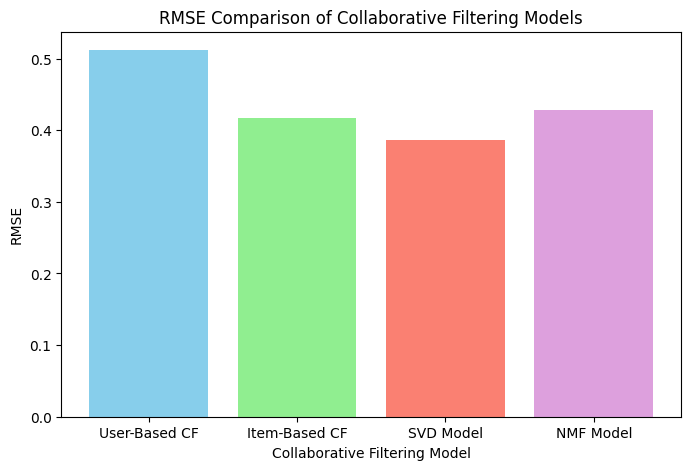

In [ ]:
# RMSE values from the collaborative filtering models
rmse_values = {
    'User-Based CF': rmse(predictions_user_knn),
    'Item-Based CF': rmse(predictions_item_knn),
    'SVD Model': rmse(predictions_svd),
    'NMF Model': rmse(predictions_nmf)
}

# Plot RMSE Comparison
plt.figure(figsize=(8, 5))
plt.bar(rmse_values.keys(), rmse_values.values(), color=['skyblue', 'lightgreen', 'salmon', 'plum'])
plt.xlabel('Collaborative Filtering Model')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Collaborative Filtering Models')
plt.show()


<ipython-input-30-657fdcabe021>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=items, y=predicted_ratings, palette='viridis')


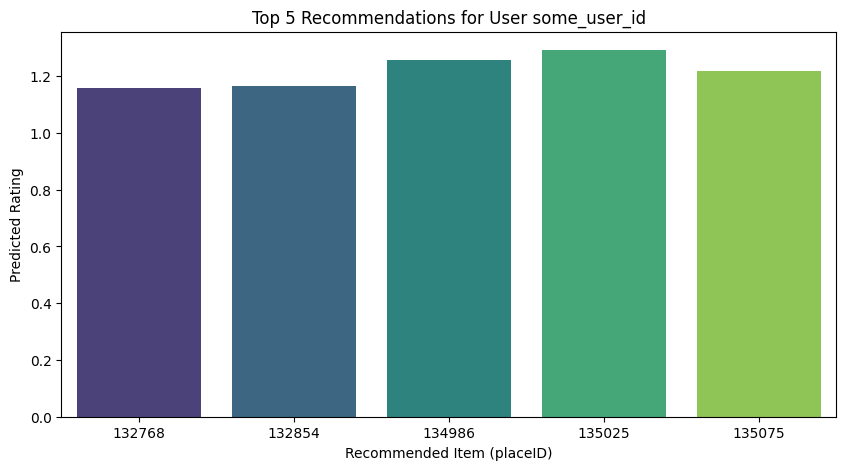

In [ ]:
# Define a specific user ID and number of recommendations
user_id = 'some_user_id'  # Replace with an actual user ID from your data
n_recommendations = 5

# Get top N recommendations for this user using the SVD model
recommendations = get_top_n_recommendations(user_id, svd_model, n=n_recommendations)

# Separate items and predicted ratings
items = [rec[0] for rec in recommendations]
predicted_ratings = [rec[1] for rec in recommendations]

# Plot Top-N Recommendations
plt.figure(figsize=(10, 5))
sns.barplot(x=items, y=predicted_ratings, palette='viridis')
plt.xlabel('Recommended Item (placeID)')
plt.ylabel('Predicted Rating')
plt.title(f'Top {n_recommendations} Recommendations for User {user_id}')
plt.show()


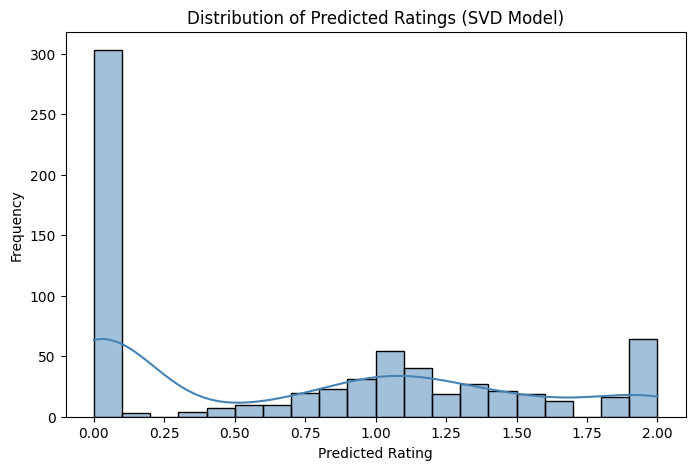

In [ ]:
# Collect all predicted ratings for SVD model in the test set
predicted_ratings_svd = [pred.est for pred in predictions_svd]

# Plot Distribution of Predicted Ratings
plt.figure(figsize=(8, 5))
sns.histplot(predicted_ratings_svd, bins=20, color='steelblue', kde=True)
plt.xlabel('Predicted Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Ratings (SVD Model)')
plt.show()
